In [1]:
import numpy as np
import time
import generalized_genSim_shorten_time_HMM as ggsdHMM
import numpy as np
import curve_fitting as cf
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf

Reached import hoc
Reached import neuron.hoc


In [2]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st.csv', 'A427D', 'na12mut8st', objective_names=['inact', 'act', 'recov'])


#evaluator = vcl_ev.Vclamp_evaluator_HMM('./param_stats_narrow.csv', 'A427D', 'na', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])

In [3]:
evaluator.wild_data

{'v_half_act': -30.769945715646724,
 'gv_slope': 6.831583265100811,
 'v_half_ssi': -62.2635624291085,
 'ssi_slope': 10.706273455390699,
 'tau_fast': 1.7388697235941555,
 'tau_slow': 1.738598002796856,
 'percent_fast': 0.7494394376982637}

In [4]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    if halloffame is not None:
        halloffame.update(population)
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)


In [5]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=10, hof = hof, map_function=pool.map)  # CHANGE offspring_size

cp_file = './cp.pkl'

In [6]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=cp_file)  # CHANGE max_ngen
end_time = time.time()
print(end_time - start_time)

TypeError: HocObject: Only Vector instance can be pickled

In [28]:
print(log)

gen	nevals	avg      	std        	min      	max      
1  	10    	0.0491723	0          	0.0491723	0.0491723
2  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
3  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
4  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
5  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
6  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
7  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
8  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
9  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
10 	10    	0.0491723	6.93889e-18	0.0491723	0.0491723


In [8]:
print(best_indvs[-1])

[251.13271452152281, 0.10437122947276659, 0.12142361782233926, 0.7963678123046358, 87.7432499817526, 0.2181806981554227, 0.9354158757810526, 0.13560383511717164, 495.71666612993937, 0.015815418422276677, 6.354865560447292, 0.0038834888710251834, 12.863770137241847, 2.806668955412046, 0.6863666713200415, 3.9607925155942967, 1519.7510537871524, 0.15726941262882127, 9.740061519725462, 2.449259386085319]


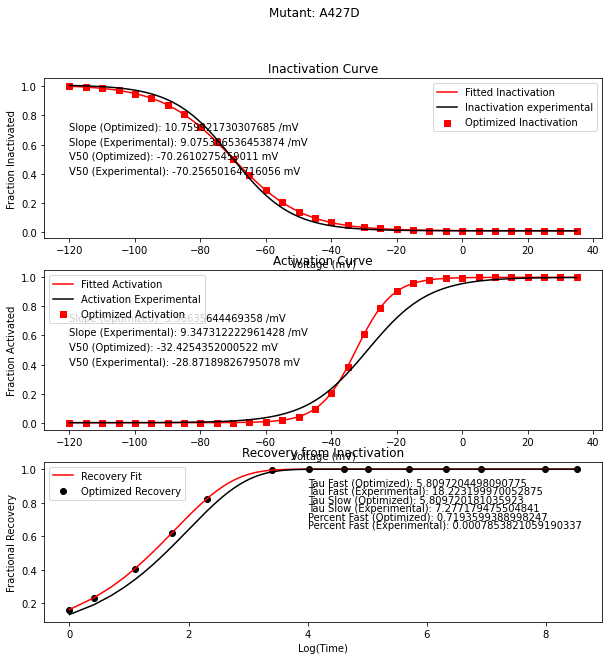

In [3]:
evaluator.plot_data([251.13271452152281, 0.10437122947276659, 0.12142361782233926, 0.7963678123046358, 87.7432499817526, 0.2181806981554227, 0.9354158757810526, 0.13560383511717164, 495.71666612993937, 0.015815418422276677, 6.354865560447292, 0.0038834888710251834, 12.863770137241847, 2.806668955412046, 0.6863666713200415, 3.9607925155942967, 1519.7510537871524, 0.15726941262882127, 9.740061519725462, 2.449259386085319], 'A427D')#'K1260E')

In [30]:
 y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj('A427D', is_HMM=True)

Couldn't generate recovery data


In [31]:
best_indvs

[[59.960808454275806,
  4.011852919500053,
  2.992222373247351,
  2.0204895911080367,
  -0.7945091439285323,
  0.00016575188193006552,
  2.8816473441237456,
  -0.4193865311667304,
  3.670003151916486,
  4.8836825708437575,
  5.571556992323238,
  2.202226014606267,
  0.9145953262003346,
  11.173810749858964,
  9.361547321148485,
  8.160212467160076,
  -49.016427975234784,
  -47.57514301749477,
  -44.250580212776285,
  -33.22218809303136,
  0.5848793914043773,
  -56.56821380984499,
  -59.05252906422991,
  15.938253344941705],
 [59.960808454275806,
  4.011852919500053,
  0.4757360786690856,
  2.131031579537972,
  -1.9327346778888221,
  0.00019325684978593836,
  1.0585651121891901,
  -1.1980761741817152,
  4.228908271730789,
  4.936109615950887,
  6.732228731380368,
  0.7782445634965374,
  0.899243116497541,
  11.173810749858964,
  14.54010034366299,
  8.160212467160076,
  -48.92390866052809,
  -42.444116265224274,
  -44.622635549422455,
  -32.384272558941106,
  -1.7142864591939393,
  -56.

Generation: 1


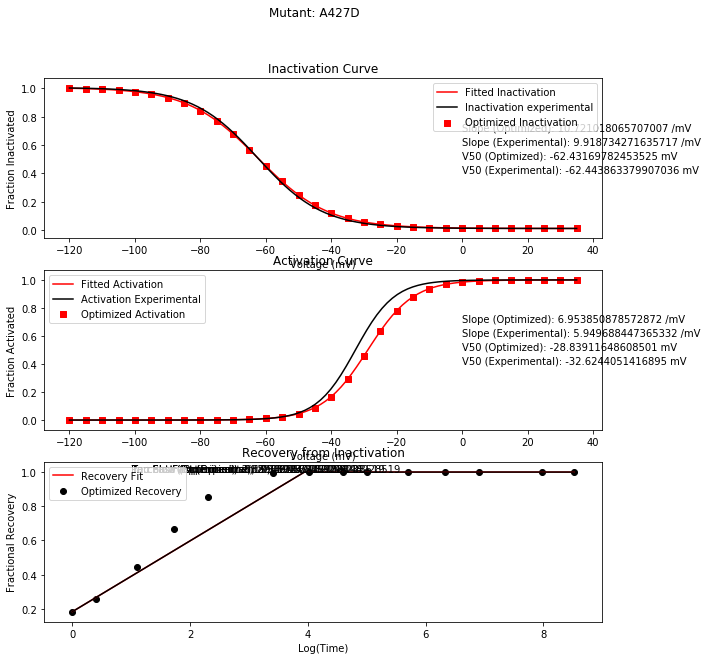

Generation: 2


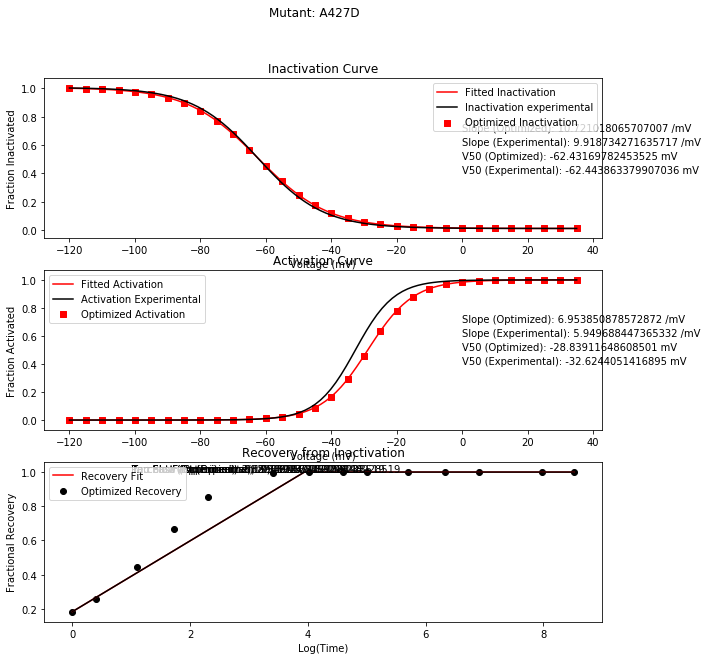

Generation: 3


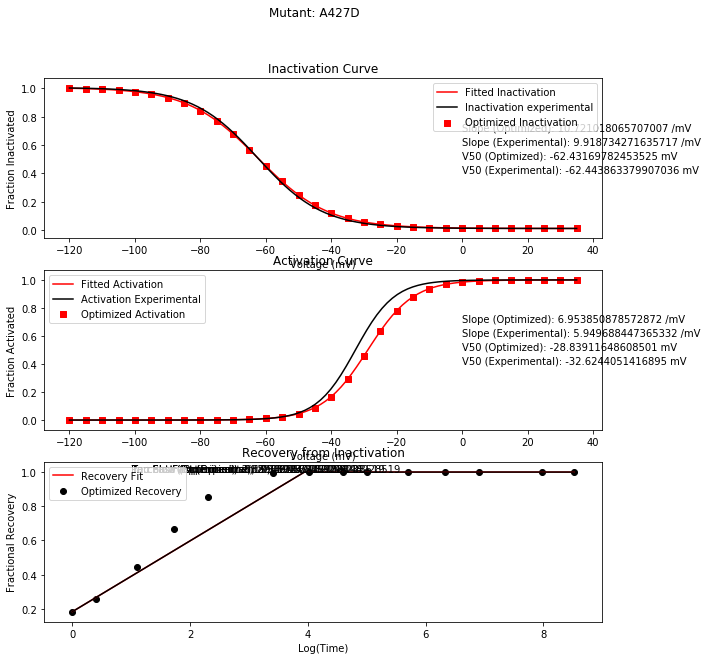

Generation: 4


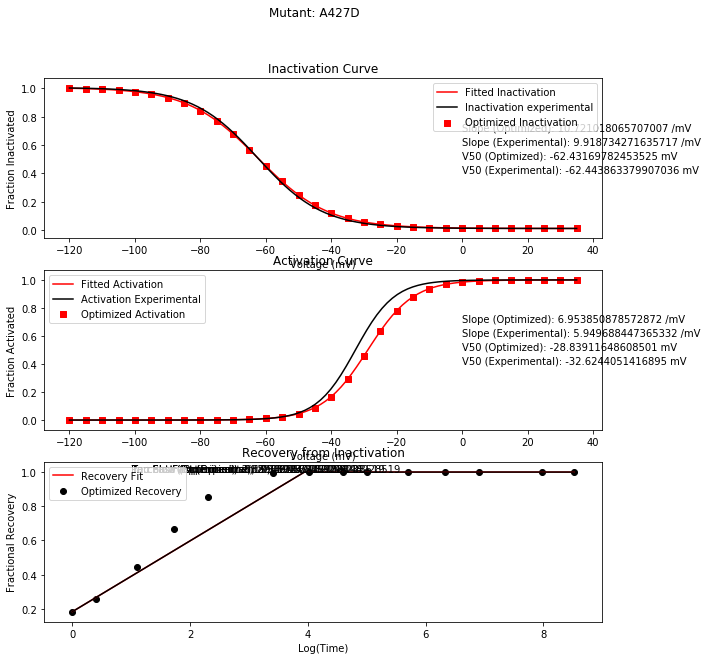

Generation: 5


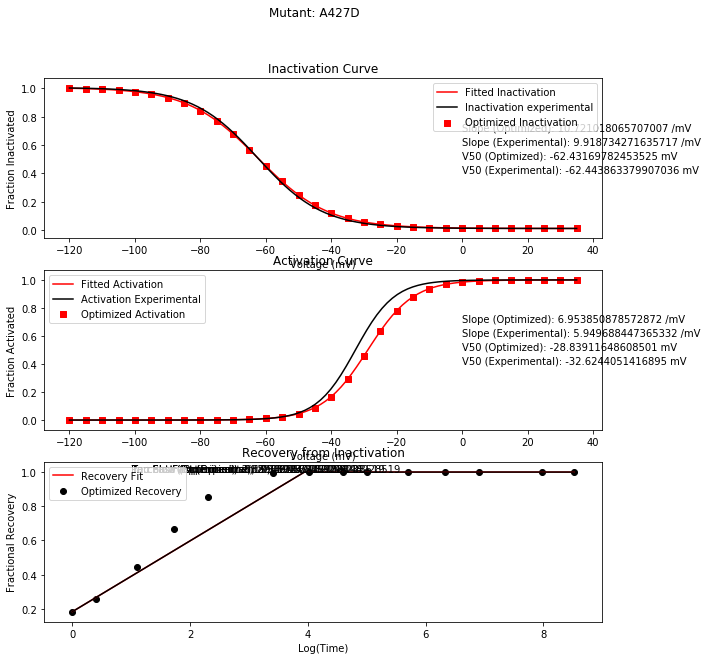

Generation: 6


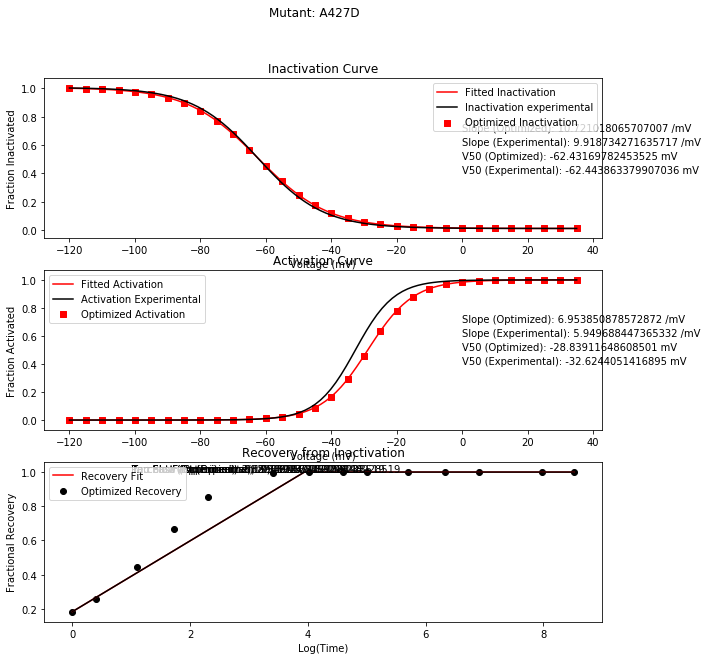

Generation: 7


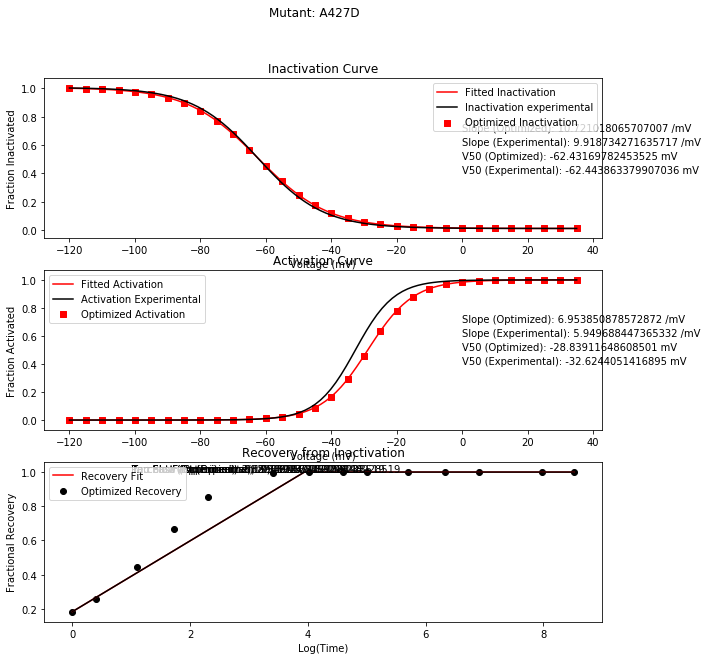

Generation: 8


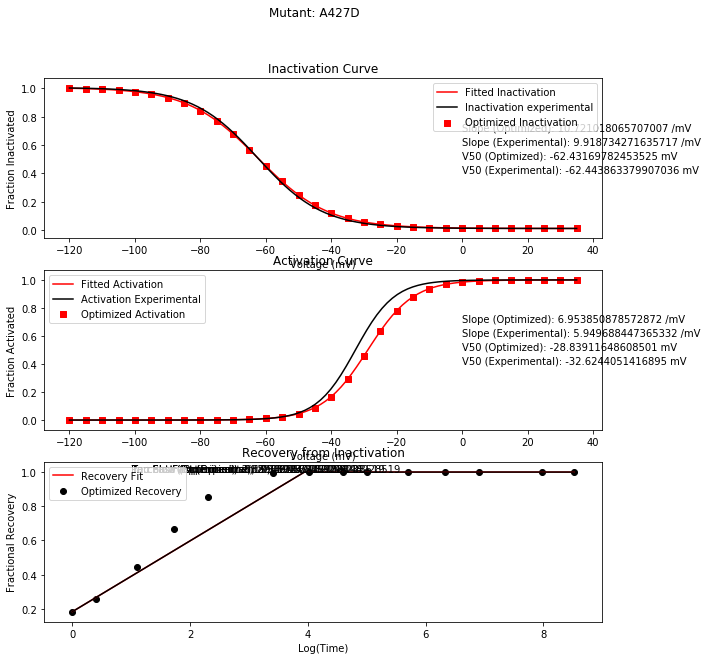

Generation: 9


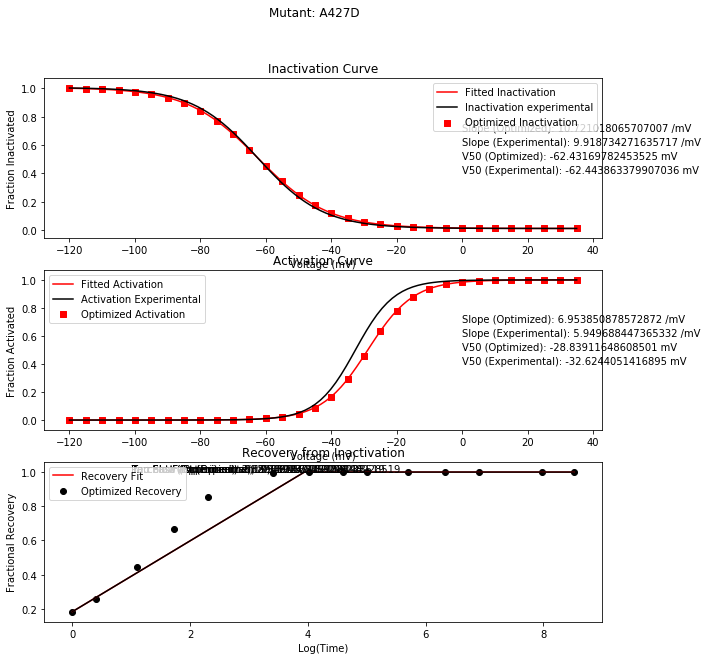

Generation: 10


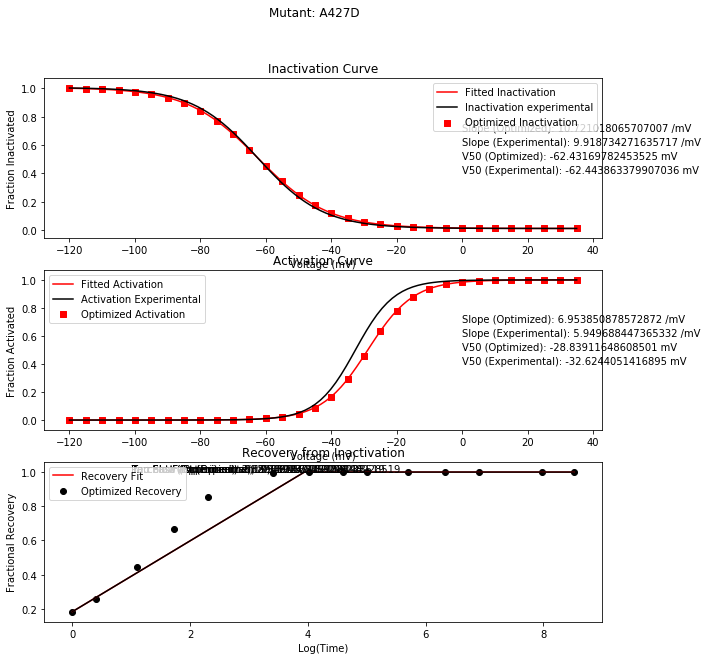

Generation: 11


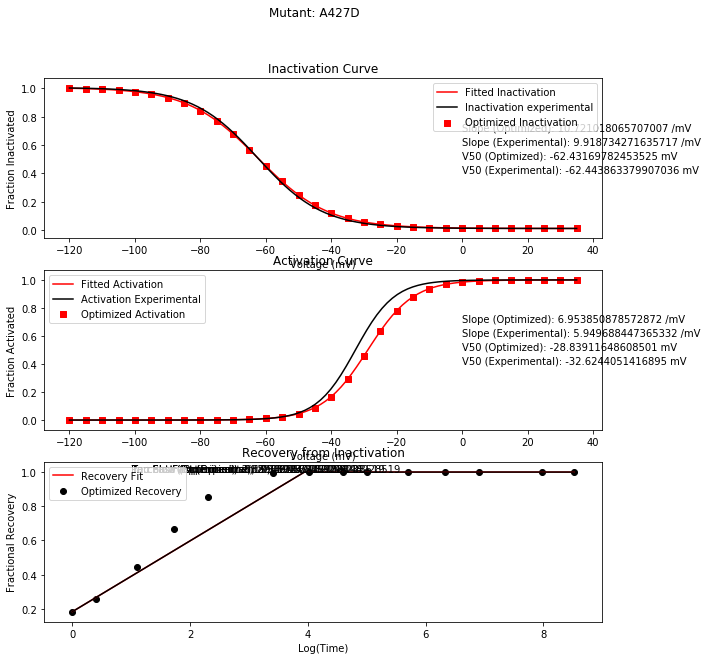

Generation: 12


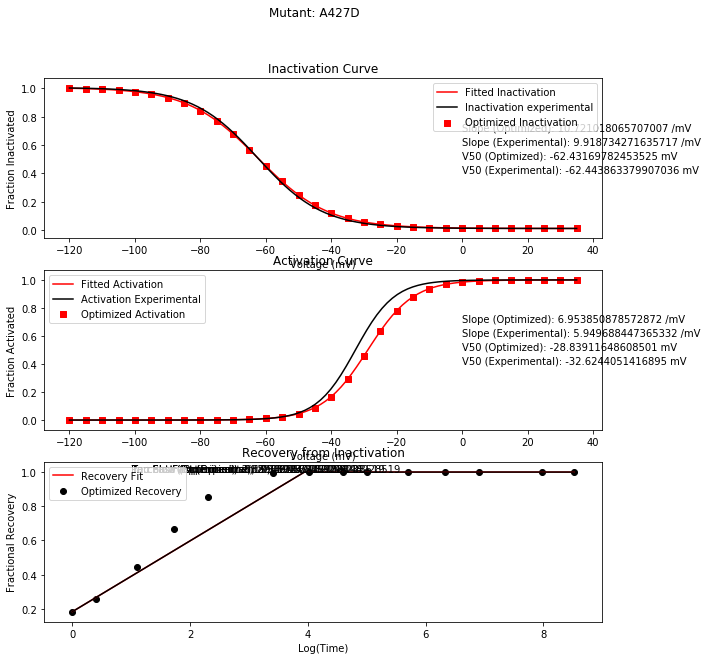

Generation: 13


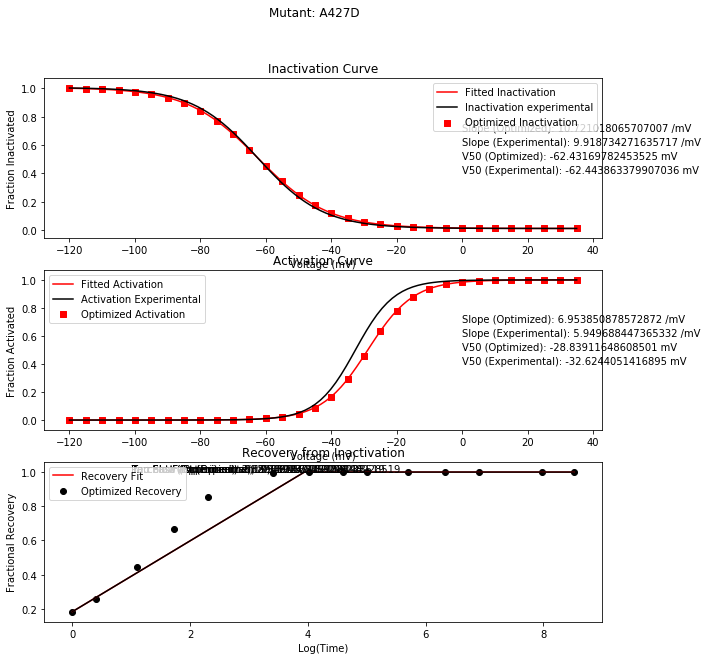

Generation: 14


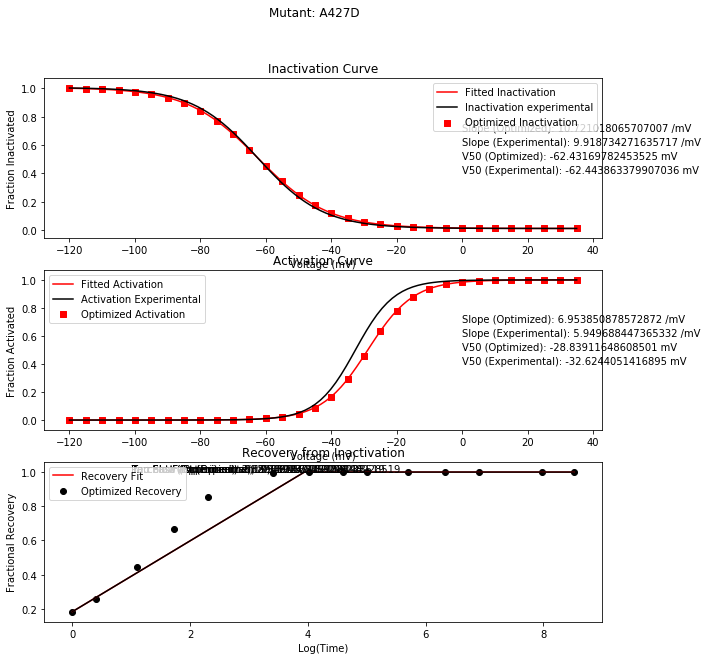

Generation: 15


IndexError: list index out of range

In [32]:
for i in range(1, 26):
    print('Generation: ' + str(i))
    evaluator.plot_data(best_indvs[i - 1], 'A427D')

In [ ]:
x = [[329.05329639102604, 0.1606308091165473, 0.03747348501333136, 0.06526885803219298, 190.9036832318502, 0.1796721956330009, 3.1289379891044624, 0.3334967529455608, 612.3972657411969, 0.3025076706861414, 3.025676019511704, 0.1259582839920209, 7.510910096536974, 0.09873672648427731, 0.45240175567275553, 2.432778951401892, 936.167509954995, 0.0192159423779658, 7.098868873725916, 2.7656822791019575], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485]]

In [ ]:
for i in range(len(x)):
    print(sum(evaluator.evaluate_with_lists(x[i])))

In [ ]:
x[3] == x[len(x) - 1]

In [ ]:
# Plotting some optimal values
evaluator.plot_data([180.6875979975121, 0.16823955067414018, 0.09980864886538265, 0.4824374737004963, 99.56973706764839, 0.078686789328423, 2.9338218229071766, 0.5261599250326092, 601.8364999904898, 0.09627324641022345, 1.4178074365320343, 0.250580513876519, 1.1625498949419764, 0.6285519005373086, 0.4569420383448888, 3.3231389753879226, 20.616036487873206, 0.07214671456172655, 6.257583287441859, 15.055110328650253], 'A427D')

In [ ]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./params_na12mut8st.csv', 'A427D', 'na12mut8st', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])

In [ ]:
evaluator.plot_data([55.66805380653187, 0.19600108106576467, 0.09987174976201142, 0.8715965845899388, 114.08959587764383, 0.12690767253535756, 1.348376713486997, 0.17672226305676939, 209.11358739071602, 0.033527986165445, 1.7979339786764499, 0.16078083780150224, 24.49727938441211, 2.4953874802512344, 0.1610697569590799, 1.4503819693806173, 324.71157454508636, 0.10111975929097147, 6.0412792502831945, 13.082083702446393], 'A427D')